In [1]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Utils.functions import createAnySymmetry,displayBoundingBox,drawMultipleSAandBB,transformKeypoints

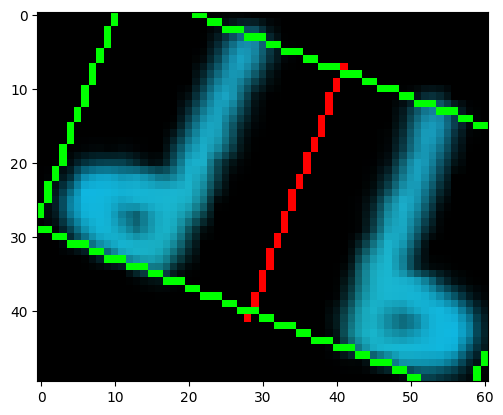

In [2]:
# Reading the database
mnist = pd.read_csv('MNIST/mnist_test.csv')

img, dict = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5])

display = img.copy()
drawMultipleSAandBB(display, dict['symAxes'], dict['center'], dict['width'], dict['height'], dict['finalRotation'])
plt.imshow(display)

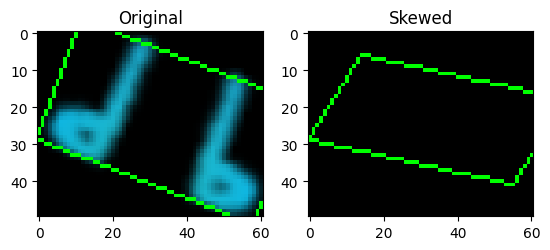

In [15]:
w, h, cx, cy = dict['width'], dict['height'], dict['center'][0], dict['center'][1]

input_pts = np.float32([
    [cx-w/2, cy-h/2],
    [cx+w/2, cy-h/2],
    [cx+w/2, cy+h/2],
    [cx-w/2, cy+h/2]
])

# Rotating
rotationMatrix = cv2.getRotationMatrix2D(dict['center'], dict['finalRotation'], 1)
rotated_input =  np.float32(transformKeypoints(input_pts, rotationMatrix))

skewPercX = 0.2
skewPercY = 0.5

output_pts = np.float32([
    [(input_pts[0][0] + (w/2)*skewPercX), (input_pts[0][1] + (h/2)*skewPercY)],
    input_pts[1],
    [(input_pts[2][0] - (w/2)*skewPercX), (input_pts[2][1] - (h/2)*skewPercY)],
    input_pts[3]
])
# Rotating
rotationMatrix = cv2.getRotationMatrix2D(dict['center'], dict['finalRotation'], 1)
output_pts =  np.float32(transformKeypoints(output_pts, rotationMatrix))

skewed = np.zeros(img.shape).astype(np.uint8)

display = img.copy()
displayBoundingBox(display, rotated_input)
displayBoundingBox(skewed, output_pts)

fig, ax = plt.subplots(1,2)
ax[0].imshow(display), ax[0].set_title(f'Original')
ax[1].imshow(skewed), ax[1].set_title('Skewed')
plt.show()

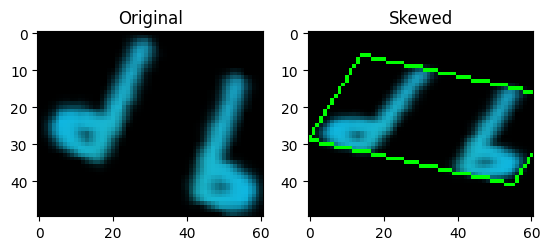

In [16]:
M = cv2.getPerspectiveTransform(rotated_input, output_pts)
out = cv2.warpPerspective(src=img,M=M,dsize=(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)
displayBoundingBox(out, output_pts)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img), ax[0].set_title(f'Original')
ax[1].imshow(out), ax[1].set_title('Skewed')
plt.show()

<h3>Putting Everything Together</h3>

Include all code into a single function.

In [17]:
def skewImage(src: np.ndarray, width: int, height: int, center) -> np.ndarray:
    w,h,cx,cy = width, height, center
    